In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_train = pd.read_csv('C:/Users/USER/Desktop/연습데이터/titanic/train.csv')

In [3]:
titanic_test = pd.read_csv('C:/Users/USER/Desktop/연습데이터/titanic/test.csv')

In [4]:
# 훈련 데이터 가져와서 살펴보기
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##간단한 시각화 하기

<AxesSubplot:xlabel='Sex', ylabel='count'>

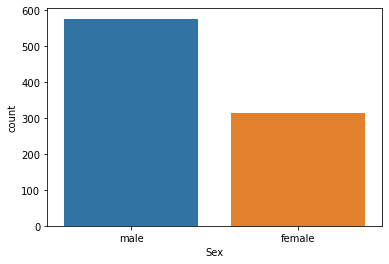

In [6]:
sns.countplot(data = titanic_train, x = 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

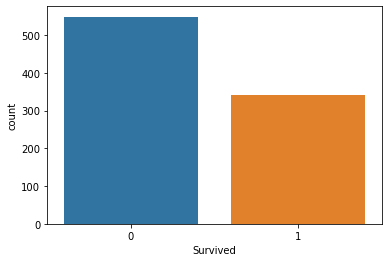

In [7]:
sns.countplot(data = titanic_train, x = 'Survived')

In [8]:
titanic_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [9]:
# 필요없는 데이터는 과감하게 지우기(경우에 따라 필요 할 수도 있으나 일단 제거)
titanic1_train = titanic_train.drop(['PassengerId', 'Name',
                                     'Ticket', 'Cabin'], axis=1)

In [10]:
titanic1_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# 결측치 확인하기 age에 177개 결측 embarked에 2개 있음을 확인
titanic1_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
# Embarked의 변수들을 확인하기
titanic1_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# Embarked의 결측치는 'Q'로 대체
titanic1_train['Embarked'].fillna(value='Q', inplace=True)

In [14]:
# 결측치 대체 된 것을 확인
titanic1_train['Embarked'].value_counts()

S    644
C    168
Q     79
Name: Embarked, dtype: int64

In [15]:
# Age 결측치는 회귀를 돌려서 대체 예정


In [16]:
titanic1_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [17]:
#우선 one-hot encodig을 통해 Sex, Embarked데이터를 분할 예정


In [18]:
titanic2_train = pd.get_dummies(titanic1_train, columns=['Sex', 'Embarked'])

In [19]:
titanic2_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [20]:
# age결측치 회귀모델 만들기
from sklearn.linear_model import LinearRegression

In [21]:
# titanic2_train1으로 카피 하기
titanic2_train1 = titanic2_train.copy()

In [22]:
# age결측 갯수 확인하기
titanic2_train1['Age'].isnull().sum()

177

In [23]:
# age를 결측이 있는 행과 없는 행으로 나누기
age_notnull = titanic2_train1[titanic2_train1['Age'].notnull()]

In [24]:
age_null = titanic2_train1[titanic2_train1['Age'].isnull()]

In [25]:
# 'Pclass','SibSp','Parch','Fare' 네가지 변수로 나이를 추측 예정
# 4 변수의 다중공선성을 확인 하기위한 작업 먼저 시작
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
x = titanic2_train1[['Pclass', 'SibSp','Parch', 'Fare']]

In [27]:
import statsmodels.api as sm

In [28]:
x = sm.add_constant(x)

In [29]:
#공선성 값 계산
vif = pd.DataFrame()
vif['feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [30]:
print(vif)

  feature        VIF
0   const  15.545509
1  Pclass   1.510760
2   SibSp   1.245451
3   Parch   1.254134
4    Fare   1.583243


In [31]:
# 다중공선성 확인 결과 4가지 변수는 큰 문제가 없다고 결과가 나옴

In [32]:
# 다시 나이 예측 모델하러 ㄱㄱ
x_train = age_notnull[['Pclass', 'SibSp','Parch', 'Fare']]
y_trian = age_notnull['Age']

In [33]:
reg = LinearRegression()
reg.fit(x_train, y_trian)

LinearRegression()

In [34]:
x_pred = age_null[['Pclass', 'SibSp','Parch', 'Fare']]
age_pred = reg.predict(x_pred)

In [35]:
age_pred

array([27.5252062 , 34.21163708, 27.54970144, 27.54970144, 27.53670802,
       27.53637832, 34.50862465, 27.53927413, 27.54961802, 27.53637832,
       27.53331567, 23.55762702, 27.53927413, 19.60717842, 40.54138852,
       40.69589539, 22.36758194, 27.53637832, 27.53331567, 27.53852932,
       27.53331567, 27.53331567, 27.53637832, 27.53877759, 23.38582473,
       27.53331567, 27.53927413, 22.22631676, 25.00020825, 27.54796355,
       27.52115048, -6.70011821, 38.95899467, 40.73156274, 14.50913876,
       -6.70011821, 34.17092093, 40.25339624, 23.55762702, 27.53927413,
       27.53927413, -6.70011821, 23.71155393, 27.53637832, 14.50913876,
       27.54324644, 23.57839822, 23.55762702, 27.5492049 , 39.67343938,
       27.53927413, 27.53927413, 40.63076544, 27.53927413, 34.46983705,
       40.73007312, 40.69589539, 40.64069621, 27.53927413, 19.57597991,
       34.22454708, 27.53331567, 39.04416036, -6.70011821, 19.57597991,
       34.76425852, 27.53637832, 23.5457101 , 40.55131929, 27.54

In [36]:
#음수 값이 몇개 보이는데 절대값으로 처리 한다
age_pred = np.abs(age_pred)

In [37]:
age_pred

array([27.5252062 , 34.21163708, 27.54970144, 27.54970144, 27.53670802,
       27.53637832, 34.50862465, 27.53927413, 27.54961802, 27.53637832,
       27.53331567, 23.55762702, 27.53927413, 19.60717842, 40.54138852,
       40.69589539, 22.36758194, 27.53637832, 27.53331567, 27.53852932,
       27.53331567, 27.53331567, 27.53637832, 27.53877759, 23.38582473,
       27.53331567, 27.53927413, 22.22631676, 25.00020825, 27.54796355,
       27.52115048,  6.70011821, 38.95899467, 40.73156274, 14.50913876,
        6.70011821, 34.17092093, 40.25339624, 23.55762702, 27.53927413,
       27.53927413,  6.70011821, 23.71155393, 27.53637832, 14.50913876,
       27.54324644, 23.57839822, 23.55762702, 27.5492049 , 39.67343938,
       27.53927413, 27.53927413, 40.63076544, 27.53927413, 34.46983705,
       40.73007312, 40.69589539, 40.64069621, 27.53927413, 19.57597991,
       34.22454708, 27.53331567, 39.04416036,  6.70011821, 19.57597991,
       34.76425852, 27.53637832, 23.5457101 , 40.55131929, 27.54

In [38]:
# 소숫점이 있는데 반올림 처리 한다
age_pred = np.round(age_pred)

In [39]:
# 처리된 값을 nan값이 있는 원본 데이터에 넣어준다
titanic2_train1.loc[titanic2_train1['Age'].isnull(), 'Age'] = age_pred

In [40]:
titanic2_train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [41]:
titanic2_train1['Age'].isnull().sum()

0

In [42]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
titanic1_test = titanic_test.drop(['PassengerId', 'Name',
                                     'Ticket', 'Cabin'], axis=1)

In [44]:
titanic1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [45]:
#테스트 데이터 확인 결과 age, fare에서 결측치 확인
titanic1_test[titanic1_test['Fare'].isna()]
# fare의 결측치 한개 확인 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [46]:
titanic1_test['Age'] = titanic1_test['Age'].round()

In [47]:
titanic1_test[titanic1_test['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.0,0,0,NaN,S


In [48]:
#Fare의 nan값은 중앙값으로 대체

In [49]:
titanic1_test.loc[titanic1_test['Fare'] != titanic1_test['Fare'],
                 'Fare'] = titanic1_test['Fare'].median()

In [50]:
titanic1_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [51]:
titanic2_test = pd.get_dummies(titanic1_test, columns=['Sex', 'Embarked'])

In [52]:
titanic2_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.0,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [53]:
#test 데이터 age 결측치는 훈련데이터 에서 돌린 값으로 대체
x_test_pred = titanic2_test[titanic2_test['Age'].isnull()][['Pclass','SibSp','Parch','Fare']]


In [54]:
# 훈련데이터 회귀로 test 데이터 예측값 만들기
age_test_pred = reg.predict(x_test_pred)

In [55]:
age_test_pred = np.abs(age_test_pred)

In [56]:
age_test_pred = np.round(age_test_pred)

In [57]:
titanic2_test.loc[titanic2_test['Age'].isnull(), 'Age'] = age_test_pred

In [58]:
titanic2_test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [59]:
# 이제 본격적인 모델링을 해보자..
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#로지스터 회귀를 사용

In [60]:
titanic_x_train = titanic2_train1[['Pclass', 'Age', 'SibSp', 'Parch',
                                 'Fare', 'Sex_female', 'Sex_male',
                                 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
titanic_y_train = titanic2_train1['Survived']

titanic_x_test = titanic2_test[['Pclass', 'Age', 'SibSp', 'Parch',
                                 'Fare', 'Sex_female', 'Sex_male',
                                 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [61]:
logist_reg = LogisticRegression(max_iter=5000)

logist_reg.fit(titanic_x_train, titanic_y_train)

LogisticRegression(max_iter=5000)

In [62]:
y_train_pred = logist_reg.predict(titanic_x_train)
print("Train Accuracy:", accuracy_score(titanic_y_train, y_train_pred))

Train Accuracy: 0.8069584736251403


In [63]:
y_test_pred = logist_reg.predict(titanic_x_test)

In [64]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [65]:
#혼돈 행렬 및, f1 - score확인
print(confusion_matrix(titanic_y_train, y_train_pred))
print(classification_report(titanic_y_train, y_train_pred))

[[478  71]
 [101 241]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



In [83]:
# test 데이터에 예측값 적용하기
titanic2_test['Survived'] = y_test_pred

In [84]:
titanic2_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,34.0,0,0,7.8292,0,1,0,1,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0,1,0,0,1,0
414,1,39.0,0,0,108.9000,1,0,1,0,0,1
415,3,38.0,0,0,7.2500,0,1,0,0,1,0
416,3,28.0,0,0,8.0500,0,1,0,0,1,0


## +AUC/ROC 시각화

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc

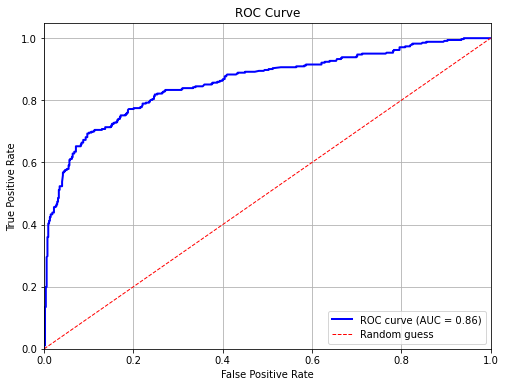

In [80]:
#  테스트 데이터 확률 예측
# 양성 클래스(생존=1) 확률만 추출
y_train_prob = logist_reg.predict_proba(titanic_x_train)[:, 1]

# FPR, TPR, threshold 계산
fpr, tpr, thresholds = roc_curve(titanic_y_train, y_train_prob)

#  AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 그래프 그리기
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [85]:
submission["Survived"] = y_test_pred
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [73]:
submission.to_csv("C:/Users/USER/Desktop/연습데이터/titanic/submission_test.csv")